# Predicting Invariant Mass From CERN Electron Collision Data Using Standard Machine Learning Regressive Models

## Objective
**Objective:** The primary purpose of this project is to explore how well different regressive models are able to predict invariant mass (M) from electron collisions.

For this project, we will be analyzing and comparing three types of regressive models. KNN Regression, Linear Regression, and two neural networks. The first is the Multilayer Perceptron model from the Scikitlearn library, the second is a model where I set the layer using the tensor flow library.

## Background
**Data set attribute:**
McCauley, Thomas; (2014). https://opendata.cern.ch/record/304

**Features of the data set:**
1) Run: The run number of the event.
2) Event: The event number.
3) E1, E2: The total energy of the electron (GeV) for electrons 1 and 2.
4) px1,py1,pz1,px2,py2,pz2: The components of the momentum of the electron 1 and 2 (GeV).
5) pt1, pt2: The transverse momentum of the electron 1 and 2 (GeV).
6) eta1, eta2: The pseudorapidity of the electron 1 and 2.
7) phi1, phi2: The phi angle of the electron 1 and 2 (rad).
8) Q1, Q2: The charge of the electron 1 and 2.
9) M: The invariant mass of two electrons (GeV).

**Data description(taken from Kaggle posting)**
This dataset contains 100k dielectron events in the invariant mass range 2-110 GeV for use in outreach and education. These data were selected for use in education and outreach and contain a subset of the total event information. The selection criteria may be different from those used in CMS physics results.

### Physics Background

**Invariant Mass**:
Invariant mass is the "true mass" of a system that remains constant regardless of its speed or the observer’s viewpoint. It depends on the system’s total energy and momentum, making it a fundamental quantity in particle physics and relativity.

**Why is Invariant Mass Important?** 
In terms of particle collisions, the invariant mass of the system remains constant before and after the collision. By analyzing the invariant mass physicists can determine newly formed particles produced by the collision.


In [127]:
#Imports
#General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import time

#Tensorflow imports 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import callbacks

#Sklearn imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor






In [128]:
#Setting the data frame and loading data
df = pd.read_csv('dielectron.csv')
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [129]:
#Cleaning data
#Check for duplicates
print(df.duplicated().sum())

#Remove duplicates
df = df.drop_duplicates()

#Check that duplicates were dropped
print(df.duplicated().sum())

#Checking for null data
print(df.isnull().sum())

#Dropping null data
df = df.dropna()

#Checking that null data was dropped on M 
print(df.isnull().sum())


23
0
Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64
Run      0
Event    0
E1       0
px1      0
py1      0
pz1      0
pt1      0
eta1     0
phi1     0
Q1       0
E2       0
px2      0
py2      0
pz2      0
pt2      0
eta2     0
phi2     0
Q2       0
M        0
dtype: int64


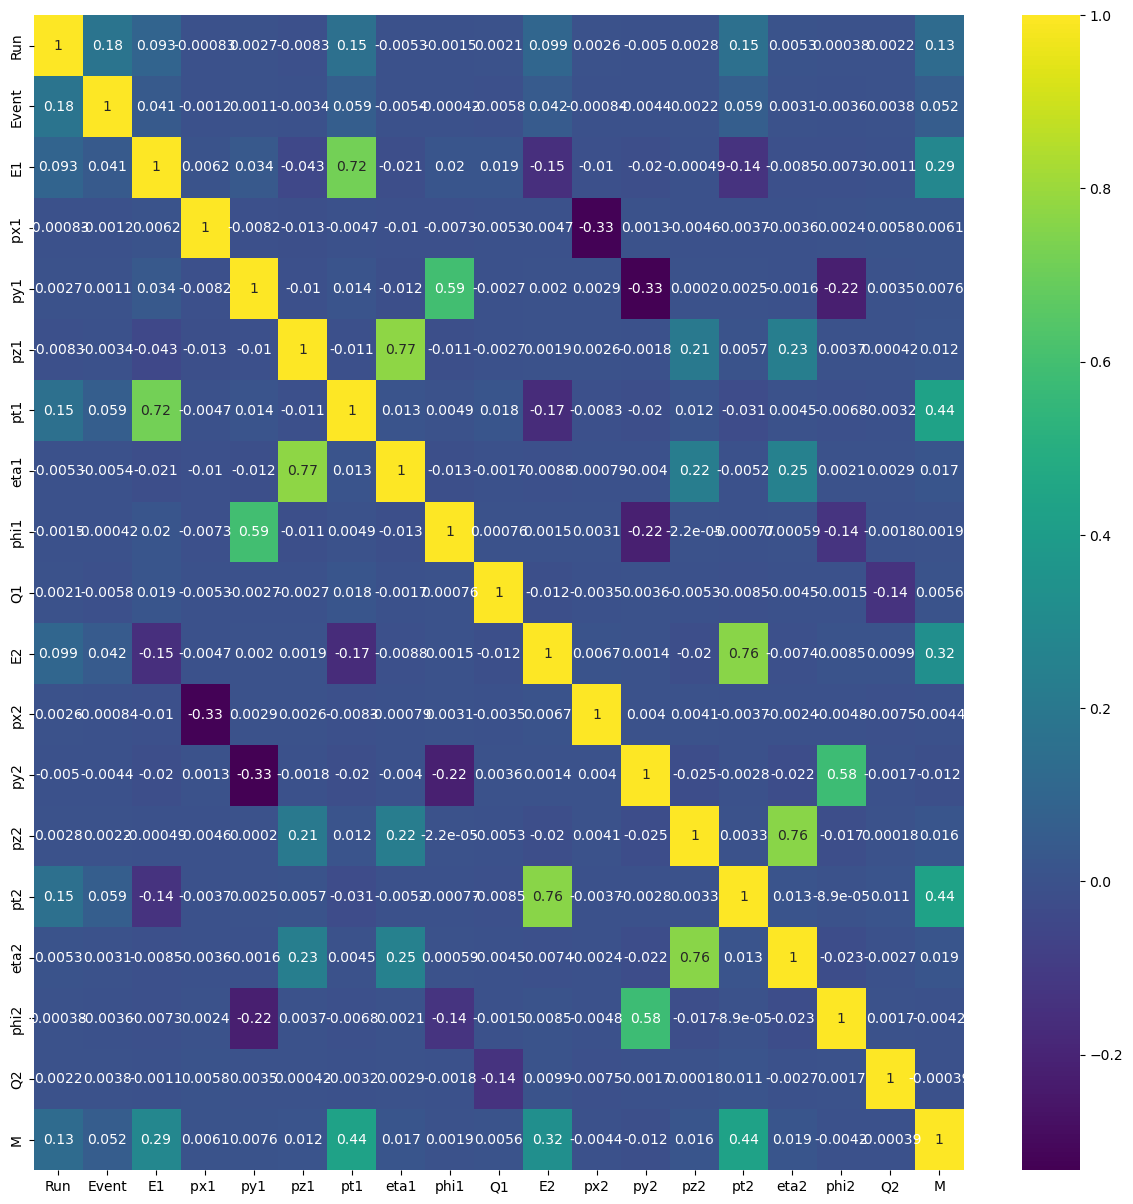

In [130]:
#Finding correlation with seaborn heat map
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cbar=True, cmap='viridis', annot=True,)
plt.show()

In [131]:
#Spliting training data
X = df.drop(columns='M')
y = df['M']

#Train test split of 80 - 20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [132]:
#Scaling data
scaler = StandardScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.fit_transform(X_test)

## KNN Regression

In [133]:
#Creating the KNN object
knn = KNeighborsRegressor(n_neighbors=6)

#Training the KNN regression model with data
start = time.time()
knn.fit(X_train_scl, y_train)
stop = time.time()
#Testing the model on test set
knn_pred = knn.predict(X_test_scl)

#calculating time
time_knn = (stop - start)

#R2 score, MQE, and MAE
print(f'This is the R2 score for KNN regression {r2_score(y_test,knn_pred)}')
print(f'This is the MSE for KNN regression {mean_squared_error(y_test, knn_pred)}')
print(f'This is the MAE for KNN regression {mean_absolute_error(y_test, knn_pred)}')
print(f'{time_knn} seconds')

This is the R2 score for KNN regression 0.8702314609214605
This is the MSE for KNN regression 82.60094644518149
This is the MAE for KNN regression 5.8920277979378355
0.009302139282226562 seconds


With one neighbor:
This is the R2 score for KNN regression 0.7869849410836003 
This is the MQE for KNN regression 138.50741117359993 
This is the MAE for KNN regression 7.664641044096301  

With three neighbors:
This is the R2 score for KNN regression 0.8579793714730155
This is the MQE for KNN regression 92.34515949522715
This is the MAE for KNN regression 6.18995990173015

With five neighbors:
This is the R2 score for KNN regression 0.8669316497471079
This is the MQE for KNN regression 86.52417719398605
This is the MAE for KNN regression 5.978115233995696


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


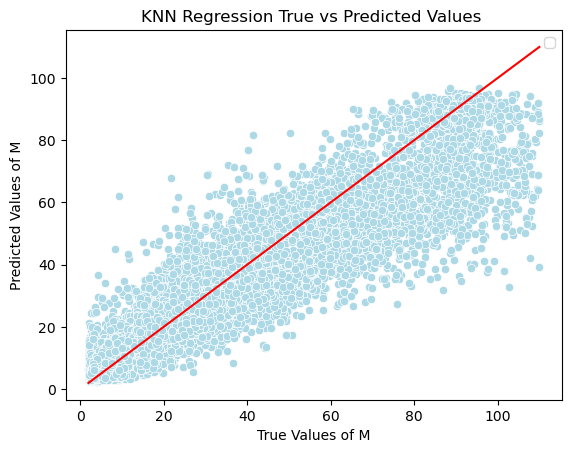

In [134]:
#KNN Regression plot
#Making the plot
sns.scatterplot(x = y_test, y = knn_pred, color='lightblue')
#calculating true value line
knn_max = y_test.max()
knn_min = y_test.min()
#plotting true value line
sns.lineplot(x = [knn_max, knn_min], y = [knn_max, knn_min], color='red')

#Labeling plot
plt.xlabel('True Values of M')
plt.ylabel('Predicted Values of M')
plt.title('KNN Regression True vs Predicted Values ')
plt.legend()
plt.show()

## Linear Regression

In [135]:

#Creating and training the data on linear regression model
lin_mod = LinearRegression()

#Training the model 
start = time.time()
lin_mod = lin_mod.fit(X_train_scl, y_train)
stop = time.time()

#calculating time
time_lr = (stop - start)

#testing model on test set
lin_pred = lin_mod.predict(X_test_scl)

print(f'This is the R2 score for linear regression {r2_score(y_test,lin_pred)}')
print(f'This is the MSE for linear regression {mean_squared_error(y_test, lin_pred)}')
print(f'This is the MAE for linear regression {mean_absolute_error(y_test, lin_pred)}')
print(f'{time_lr} seconds')

This is the R2 score for linear regression 0.4085612609971715
This is the MSE for linear regression 376.4656668933514
This is the MAE for linear regression 14.14962550409287
0.07860612869262695 seconds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


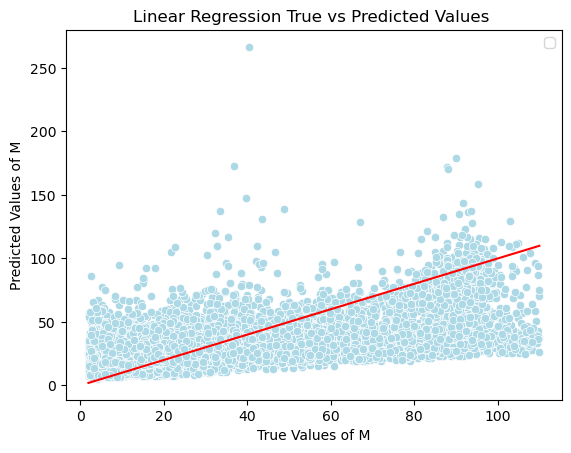

In [136]:
#Linear Regression plot
#Making the plot
sns.scatterplot(x = y_test, y = lin_pred, color='lightblue')
#calculating true value line
lin_max = y_test.max()
lin_min = y_test.min()
#plotting true value line
sns.lineplot(x = [lin_max, lin_min], y = [lin_max, lin_min], color='red')

#Labeling plot
plt.xlabel('True Values of M')
plt.ylabel('Predicted Values of M')
plt.title('Linear Regression True vs Predicted Values ')
plt.legend()
plt.show()

## Neural Network Exploration
### Using Scikit MLP model

In [137]:
#Creating and training the MLP model
mlp = MLPRegressor(activation='relu', solver='adam', max_iter=300)

#Training the model
start = time.time()
mlp = mlp.fit(X_train_scl, y_train)
stop = time.time()

#Testing model on test set
mlp_pred = mlp.predict(X_test_scl)

#calculating time
time_mlp = (stop - start)

print(f'This is the R2 score for linear regression {r2_score(y_test,mlp_pred)}')
print(f'This is the MSE for SKL NN {mean_squared_error(y_test, mlp_pred)}')
print(f'This is the MAE for SKL NN {mean_absolute_error(y_test, mlp_pred)}')
print(f'{time_mlp} seconds')

This is the R2 score for linear regression 0.9955826481762579
This is the MSE for SKL NN 2.8117557923774763
This is the MAE for SKL NN 1.1244265502073765
91.22424507141113 seconds


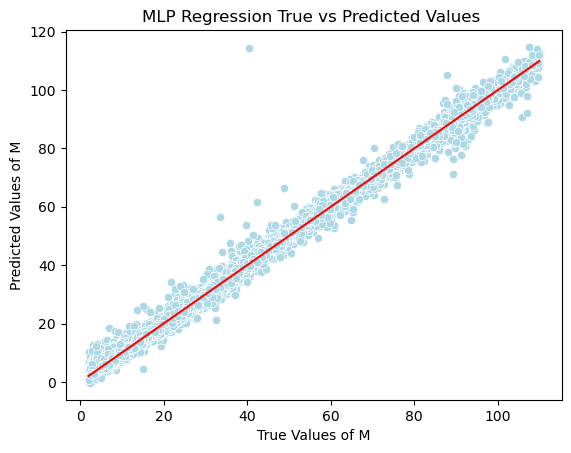

In [138]:
#MLP Regression plot
#Making the plot
sns.scatterplot(x = y_test, y = mlp_pred, color='lightblue')
#calculating true value line
mlp_max = y_test.max()
mlp_min = y_test.min()
#plotting true value line
sns.lineplot(x = [mlp_max, mlp_min], y = [mlp_max, mlp_min], color='red')
#sns.lineplot(x = [0,100], y = [0,100], color='red')

#Labeling plot
plt.xlabel('True Values of M')
plt.ylabel('Predicted Values of M')
plt.title('MLP Regression True vs Predicted Values ')
plt.show()

## Tensor flow neural network 


In [139]:
X_train_scl.shape

(79913, 18)

In [140]:
#Setting up the neural network layers
nn_model = keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(18,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])
nn_model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 256)            │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,921 (445.00 KB)

 Trainable params: 113,921 (445.00 KB)

 Non-trainable params: 0 (0.00 B)

In [141]:
#stop = earlystopping = callbacks.EarlyStopping(monitor= 'loss', patience=5, mode='min', restore_best_weights=True)

#Compiling the NN
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mean_squared_error', metrics=['mean_squared_error','mean_absolute_error'])

#Training the model
start = time.time()
history = nn_model.fit(X_train_scl, y_train, epochs=100, validation_split=0.2, verbose=0)
stop = time.time()

In [142]:
nn_pred = nn_model.predict(X_test_scl).flatten()

#calculating time
time_nn = (stop - start)

print(f'This is the R2 score for neural network model {r2_score(y_test, nn_pred)}')
print(f'This is the MSE for NN regression {mean_squared_error(y_test, nn_pred)}')
print(f'This is the MAE for NN regression {mean_absolute_error(y_test, nn_pred)}')
print(f'{time_nn} seconds')

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
This is the R2 score for neural network model 0.999002583126514
This is the MSE for NN regression 0.6348809837526804
This is the MAE for NN regression 0.49706138687994145
419.6914837360382 seconds


Text(0.5, 1.0, 'Tensorflow NN Regression True vs Predicted Values ')

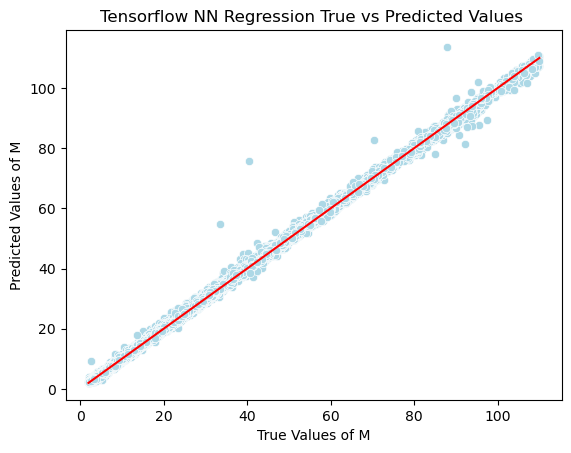

In [143]:
#MLP Regression plot
#Making the plot
sns.scatterplot(x = y_test, y = nn_pred, color='lightblue')
#calculating true value line
nn_max = y_test.max()
nn_min = y_test.min()
#plotting true value line
sns.lineplot(x = [nn_max, nn_min], y = [nn_max, nn_min], color='red')

#Labeling plot
plt.xlabel('True Values of M')
plt.ylabel('Predicted Values of M')
plt.title('Tensorflow NN Regression True vs Predicted Values ')

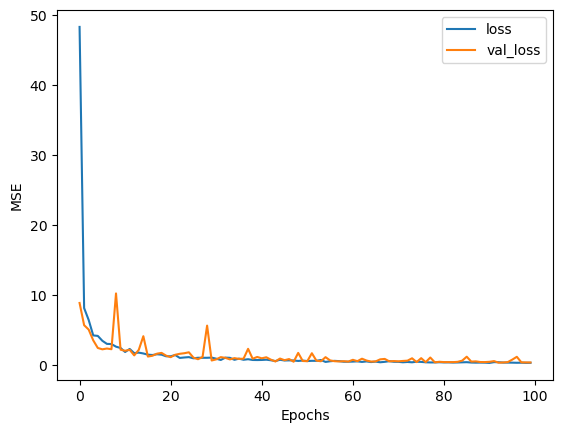

In [144]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

## Results
###

Text(0, 0.5, 'R Squared')

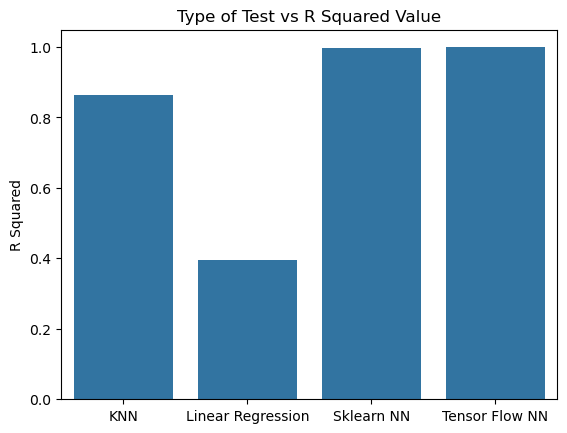

In [145]:
test_type = ['KNN','Linear Regression', 'Sklearn NN', 'Tensor Flow NN']
R_squared = [0.8643,0.3945,0.9959,0.9989]
MSE = [85.58,382.10,2.537,0.6863]

sns.barplot(x=test_type, y=R_squared)
plt.title('Type of Test vs R Squared Value')
plt.ylabel('R Squared')

Text(0, 0.5, 'MSE')

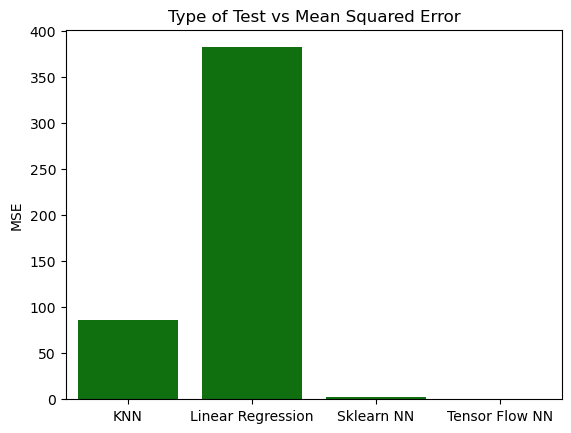

In [146]:
sns.barplot(x=test_type, y=MSE, color='green')
plt.title('Type of Test vs Mean Squared Error')
plt.ylabel('MSE')


[0.009302139282226562, 0.07860612869262695, 91.22424507141113, 419.6914837360382]


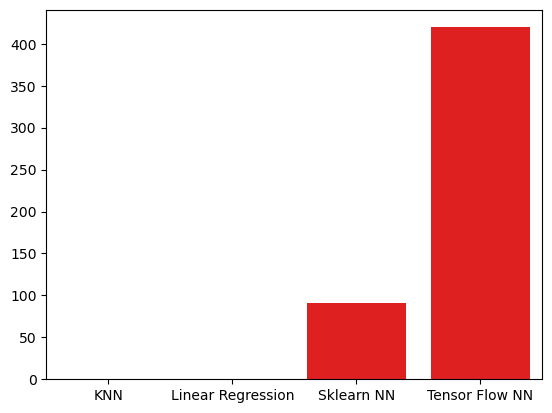

In [147]:
time_plot = [time_knn, time_lr, time_mlp, time_nn]
sns.barplot(x=test_type, y=time_plot, color='red')

print(time_plot)

#### From the data we can see that while the Tensor Flow neural network produced the lowest MSE and highest R^2 value, it was the most computationally expensive. Linear regression is by far the worst model for predicting invariant mass with this data set. KNN provides a good estimate quickly with decent R^2 values. The SKlearn NN was quick and provided a very good R^2 value and prediction of the invarient mass. 
